# Pandas

### pandas 이용해서 데이터 만들기, 빈데이터에 추가하기, 데이터 합치기

In [ ]:
import pandas as pd

#1번째 방법
data = {
    '종목코드': ['037730', '036360', '005760'],
    '종목명': ['3R', '3SOFT', 'ACTS'],
    '현재가': [1510, 1790, 1185]
}
df = pd.DataFrame(data)           # DataFrame 클래스의 객체 생성 (생성자 호출)
print("1번째 방법\n",df)

#2번째 방법
df2 = pd.DataFrame({
    '종목코드': ['037730', '036360', '005760'],
    '종목명': ['3R', '3SOFT', 'ACTS'],
    '현재가': [1510, 1790, 1185]
}) 
print("\n2번째 방법\n",df2)

# 3번째 방법
data2 = [
    ["3R", 1510, 7.36],
    ["3SOFT", 1790, 1.65],
    ["ACTS", 1185, 1.28],
]
index = ["037730", "036360", "005760"]
columns = ["종목명", "현재가", "등락률"]

df3 = pd.DataFrame(data=data2, index=index, columns=columns)
df3.index.name = "종목코드"
print("\n3번째 방법\n",df3)

##########################################
#기존의 데이터를 합치는 방법으로 생성
##########################################
#4번째 Series , append 이용 방법
df_s = pd.DataFrame(columns = df3.columns)
s = pd.Series(data=["3R", 1510,7.36], index=df3.columns)
df_s.loc["066570"] = s
df_s.loc["036360"] = ["3SOFT", 1790,1.65]
s = pd.Series(data=["ACTS", 1185,1.28], index=df3.columns, name="005760")
df_s = df_s.append(s)
print("\n4번째 Series 사용 방법\n",df_s)

#5번째 append 이용 방법 
df4 = pd.DataFrame(columns = df3.columns) # df2의 칼럼만 복사
df4 = df4.append({'종목코드' :'037730','종목명': '3R' ,'현재가': 1510 },ignore_index=True)
df4 = df4.append({'종목코드' :'036360','종목명': '3SOFT' ,'현재가': 1790 },ignore_index=True)
df4 = df4.append({'종목코드' :'005760','종목명': 'ACTS' ,'현재가': 1185 },ignore_index=True)
print("\n5번째 append 사용 방법\n",df4)

#6번째 방법 concat에 join을 넣어줘서 어느 쪽에 있는 것만 합칠 수도 있음. 
df5 = pd.DataFrame({'종목코드' :['037730'],'종목명': ['3R'] ,'현재가': [1510] })
df6 = pd.DataFrame({'종목코드' :['036360','005760'],'종목명': ['3SOFT','ACTS'] ,'현재가': [1790 , 1185]})
df7 = pd.concat([df5,df6], axis=0)       #행방향
df8 = pd.concat([df5,df6], axis=1)       #열방향
print("\n6번째 concat axis=0 일때 방법\n",df7)
print("\n6번째 concat axis=1 일때 방법\n",df8)

#7번째 방법 
df9 = pd.merge(df5,df6, how='outer', left_index=False, right_index=False)
print("\n7번째 merge 방법 \n",df9)

1번째 방법
      종목코드    종목명   현재가
0  037730     3R  1510
1  036360  3SOFT  1790
2  005760   ACTS  1185

2번째 방법
      종목코드    종목명   현재가
0  037730     3R  1510
1  036360  3SOFT  1790
2  005760   ACTS  1185

3번째 방법
           종목명   현재가   등락률
종목코드                     
037730     3R  1510  7.36
036360  3SOFT  1790  1.65
005760   ACTS  1185  1.28

4번째 Series 사용 방법
           종목명   현재가   등락률
066570     3R  1510  7.36
036360  3SOFT  1790  1.65
005760   ACTS  1185  1.28

5번째 append 사용 방법
      종목명   현재가  등락률    종목코드
0     3R  1510  NaN  037730
1  3SOFT  1790  NaN  036360
2   ACTS  1185  NaN  005760

6번째 concat axis=0 일때 방법
      종목코드    종목명   현재가
0  037730     3R  1510
0  036360  3SOFT  1790
1  005760   ACTS  1185

6번째 concat axis=1 일때 방법
      종목코드  종목명     현재가    종목코드    종목명   현재가
0  037730   3R  1510.0  036360  3SOFT  1790
1     NaN  NaN     NaN  005760   ACTS  1185

7번째 merge 방법 
      종목코드    종목명   현재가
0  037730     3R  1510
1  036360  3SOFT  1790
2  005760   ACTS  1185


### 인덱스 

In [ ]:
print("원본\n", df9, "\n")
df9 = df9.set_index('종목코드')
print("index 변경후\n",df9, "\n")
df9 = df9.reset_index()
print("reset 후\n",df9,"\n")

원본
      종목코드    종목명   현재가
0  037730     3R  1510
1  036360  3SOFT  1790
2  005760   ACTS  1185 

index 변경후
           종목명   현재가
종목코드               
037730     3R  1510
036360  3SOFT  1790
005760   ACTS  1185 

reset 후
      종목코드    종목명   현재가
0  037730     3R  1510
1  036360  3SOFT  1790
2  005760   ACTS  1185 



### 칼럼 인덱싱, 슬라이싱

In [ ]:
# 종목코드에 해당하는 현재가 칼럼만 받아오기
df9 = df9.set_index('종목코드')
print(df9[ '현재가' ])      # 시리즈로 반환  인덱싱
print(type(df9[ '현재가' ]))
print(df9[ [ '현재가' ] ])    # 데이터프레임으로 반환  슬라이싱
print(type(df9[ [ '현재가' ] ]))

종목코드
037730    1510
036360    1790
005760    1185
Name: 현재가, dtype: int64
<class 'pandas.core.series.Series'>
         현재가
종목코드        
037730  1510
036360  1790
005760  1185
<class 'pandas.core.frame.DataFrame'>


### 로우 인덱싱, 슬라이싱 (loc, iloc)
 - loc 인덱스를 기준으로 로우 데이터 추출
 - iloc 행 번호를 기준으로 로우 데이터 추출

In [ ]:
import pandas as pd
data = [
    ["3R", 1510, 7.36],
    ["3SOFT", 1790, 1.65],
    ["ACTS", 1185, 1.28]
]

index = ["037730", "036360", "005760"]
columns = ["종목명", "현재가", "등락률"]
df = pd.DataFrame(data=data, index=index, columns=columns)
# 인덱싱
print("인덱싱\nloc\n",df.loc["037730"])
print("\niloc\n",df.iloc[ 0 ])

#슬라이싱
print("\n슬라이싱\nloc\n",df.loc[ [ "037730", "036360" ] ])
print("\niloc\n",df.iloc[ [ 0, 1 ] ])

인덱싱
loc
 종목명      3R
현재가    1510
등락률    7.36
Name: 037730, dtype: object

iloc
 종목명      3R
현재가    1510
등락률    7.36
Name: 037730, dtype: object

슬라이싱
loc
           종목명   현재가   등락률
037730     3R  1510  7.36
036360  3SOFT  1790  1.65

iloc
           종목명   현재가   등락률
037730     3R  1510  7.36
036360  3SOFT  1790  1.65


# ========================================================

In [ ]:
# 같이 사용가능
# 행 번호로 행 선택 후 시리즈 인덱싱 
print(df.iloc[0].iloc[1])               # 시리즈 행 번호
print(df.iloc[0][1])
print(df.iloc[0].loc["현재가"])         # 시리즈 인덱스 
print(df.iloc[0]["현재가"])            # 시리즈 인덱스
print(df.iloc[0, 1])

# 인덱스로 행 선택 후 시리즈 인덱싱 
print(df.loc["037730"].iloc[1])        # 시리즈 행 번호
print(df.loc["037730"].loc["현재가"])  # 시리즈 인덱스 
print(df.loc["037730"]["현재가"])     # 시리즈 인덱스
print(df.loc["037730", "현재가"])
print(df["현재가"]["037730"])

1510
1510
1510
1510
1510
1510
1510
1510
1510
1510


In [ ]:
# 특정행 가져오기
print(df.iloc[[0, 1], [0, 1]])
print(df.loc[["037730", "036360"], ["종목명", "현재가"]])

          종목명   현재가
037730     3R  1510
036360  3SOFT  1790
          종목명   현재가
037730     3R  1510
036360  3SOFT  1790


In [ ]:
# 1500 이상의 값만 받아오기
temp = df['현재가'] >= 1500
print(df.loc[temp],"\n")
print(df.loc[df['현재가'] >= 1500],"\n")

print(df.loc[~temp])

          종목명   현재가   등락률
037730     3R  1510  7.36
036360  3SOFT  1790  1.65 

          종목명   현재가   등락률
037730     3R  1510  7.36
036360  3SOFT  1790  1.65 

         종목명   현재가   등락률
005760  ACTS  1185  1.28


In [ ]:
# 현재가만 받아오기
print(df.loc[temp]["현재가"])
print(df.loc[temp, "현재가"])

037730    1510
036360    1790
Name: 현재가, dtype: int64
037730    1510
036360    1790
Name: 현재가, dtype: int64


In [ ]:
temp = (df['현재가'] >= 1500) & (df['현재가'] < 1700)
print("==== 데이터 어떻게 나오는지 확인 \n",df['현재가'] >= 1500)
print(df['현재가'] < 1700,"\n==================")

print(df.loc[temp],"\n")
print(df.loc[(df['현재가'] >= 1500) & (df['현재가'] < 1700)],"\n")
print(df[(df['현재가'] >= 1500) & (df['현재가'] < 1700)],"\n")

print(df.loc[~temp])

==== 데이터 어떻게 나오는지 확인 
 037730     True
036360     True
005760    False
Name: 현재가, dtype: bool
037730     True
036360    False
005760     True
Name: 현재가, dtype: bool 
       종목명   현재가   등락률
037730  3R  1510  7.36 

       종목명   현재가   등락률
037730  3R  1510  7.36 

       종목명   현재가   등락률
037730  3R  1510  7.36 

          종목명   현재가   등락률
036360  3SOFT  1790  1.65
005760   ACTS  1185  1.28


### 칼럼 추가

In [ ]:
df

,종목명,현재가,등락률
037730,3R,1510,7.36
036360,3SOFT,1790,1.65
005760,ACTS,1185,1.28


In [ ]:
#round 활용 (반올림 함수)
cash = 100000
df['비중'] = round(100/3,1)
df['투입금액'] = round(cash * df['비중']/100, -2)
df['보유주식수'] = round( df['투입금액']/ df['현재가'] ,2)
df

,종목명,현재가,등락률,비중,투입금액,보유주식수
037730,3R,1510,7.36,33.3,33300.0,22.05
036360,3SOFT,1790,1.65,33.3,33300.0,18.60
005760,ACTS,1185,1.28,33.3,33300.0,28.10


### 삭제하기

In [ ]:
df = df.drop('현재가', axis=1)
df

,종목명,등락률,비중,투입금액,보유주식수
037730,3R,7.36,33.3,33300.0,22.05
036360,3SOFT,1.65,33.3,33300.0,18.60
005760,ACTS,1.28,33.3,33300.0,28.10


In [ ]:
df = df.drop("005760", axis=0)
df

,종목명,등락률,비중,투입금액,보유주식수
037730,3R,7.36,33.3,33300.0,22.05
036360,3SOFT,1.65,33.3,33300.0,18.60


In [ ]:
data123 = {
    '종목코드': ['037730', '036360', '005760','000821','149231'],
    '종목명': ['3R', '3SOFT', 'ACTS', 'abc','bcd'],
    '현재가': [1510, 1790, 1185, 1231 , 5643]
}
index1 = [1 , 2 , 3, 4 , 5]
df123 = pd.DataFrame(data = data123, index = index1)
df123

,종목코드,종목명,현재가
1,037730,3R,1510
2,036360,3SOFT,1790
3,005760,ACTS,1185
4,000821,abc,1231
5,149231,bcd,5643


In [ ]:
df123 = df123.drop(2, axis=0) # 인덱스 2 삭제
df123

,종목코드,종목명,현재가
1,037730,3R,1510
3,005760,ACTS,1185
4,000821,abc,1231
5,149231,bcd,5643


In [ ]:
drop_list = [1,4]
df123 = df123.drop([1,4], axis=0) 
df123

,종목코드,종목명,현재가
3,005760,ACTS,1185
5,149231,bcd,5643


### GroupBy

In [ ]:
data = [
    ["2차전지(생산)", "SK이노베이션", 10.19, 1.29],
    ["해운", "팬오션", 21.23, 0.95],
    ["시스템반도체", "티엘아이", 35.97, 1.12],
    ["해운", "HMM", 21.52, 3.20],
    ["시스템반도체", "아이에이", 37.32, 3.55],
    ["2차전지(생산)", "LG화학", 83.06, 3.75]
]

columns = ["테마", "종목명", "PER", "PBR"]
df = pd.DataFrame(data=data, columns=columns)
df1 = df[df['테마'] == "2차전지(생산)"]
df2 = df[df['테마'] == "해운"]
df3 = df[df['테마'] == "시스템반도체"]
df

,테마,종목명,PER,PBR
0,2차전지(생산),SK이노베이션,10.19,1.29
1,해운,팬오션,21.23,0.95
2,시스템반도체,티엘아이,35.97,1.12
3,해운,HMM,21.52,3.20
4,시스템반도체,아이에이,37.32,3.55
5,2차전지(생산),LG화학,83.06,3.75


### 문제 각 테마별로 PER 평균 구하고 해당 테마별로 시리즈에 저장해보세요.

In [ ]:
mean1 = df1['PER'].mean()
mean2 = df2['PER'].mean()   
mean3 = df3['PER'].mean()

data = [mean1, mean2, mean3]
index = ["2차전지(생산)", "해운", "시스템반도체"]
s = pd.Series(data=data, index=index)
# ss = pd.Series({"2차전지(생산)":mean1, "해운":mean2, "시스템반도체":mean3})
# print(ss)
print(s)

2차전지(생산)    46.625
해운          21.375
시스템반도체      36.645
dtype: float64


In [ ]:
# 위 과정을 한번에
# df.groupby("테마")["PER"].mean()
df.groupby(['테마', 'PER']).mean()

PBR
테마       PER        
2차전지(생산) 10.19  1.29
         83.06  3.75
시스템반도체   35.97  1.12
         37.32  3.55
해운       21.23  0.95
         21.52  3.20

### DataFrame 저장

#### CSV 파일로 저장 (csv 파일 용량이 작기 때문에 excel보다 csv확장자 사용 추천)

In [ ]:
# CSV파일로 저장하기
data = [
    ["2차전지(생산)", "SK이노베이션", 10.19, 1.29],
    ["해운", "팬오션", 21.23, 0.95],
    ["시스템반도체", "티엘아이", 35.97, 1.12],
    ["해운", "HMM", 21.52, 3.20],
    ["시스템반도체", "아이에이", 37.32, 3.55],
    ["2차전지(생산)", "LG화학", 83.06, 3.75]
]
columns = ["테마", "종목명", "PER", "PBR"]
df = pd.DataFrame(data=data, columns=columns)

df.to_csv("test.csv",sep=',', na_rep='NaN', encoding='cp949')  
# index=False, 넣어보고 차이점 비교 , seperator, delimiter (구분자)
"""
encoding 옵션: csv 파일에서 한글 (컬럼 혹은 내용) 읽어올 때 
encoding='cp949' (혹은 encoding='euc-kr') 옵션 사용, 엑셀의 csv 파일 utf-8 인코딩 (유니코드) 인식 버그
"""
# CSV파일 읽기

df1 = pd.read_csv("test.csv", encoding='cp949')
df1

,Unnamed: 0,테마,종목명,PER,PBR
0,0,2차전지(생산),SK이노베이션,10.19,1.29
1,1,해운,팬오션,21.23,0.95
2,2,시스템반도체,티엘아이,35.97,1.12
3,3,해운,HMM,21.52,3.20
4,4,시스템반도체,아이에이,37.32,3.55
5,5,2차전지(생산),LG화학,83.06,3.75


### 실습 Unnamed: 0 칼럼 이름을 number로 바꿔보고 인덱스로 변경 해보기기

In [ ]:
df1.rename(columns = {'Unnamed: 0' : '원하는 칼럼 이름', '테마':'테마2'}, inplace = True)
df1

,원하는 칼럼 이름,테마2,종목명,PER,PBR
0,0,2차전지(생산),SK이노베이션,10.19,1.29
1,1,해운,팬오션,21.23,0.95
2,2,시스템반도체,티엘아이,35.97,1.12
3,3,해운,HMM,21.52,3.20
4,4,시스템반도체,아이에이,37.32,3.55
5,5,2차전지(생산),LG화학,83.06,3.75


In [ ]:
df1.rename(columns = {'Unnamed: 0' : 'number'}, inplace = True)
df1 = df1.set_index('number')
df1

,테마,종목명,PER,PBR
number,,,,
0,2차전지(생산),SK이노베이션,10.19,1.29
1,해운,팬오션,21.23,0.95
2,시스템반도체,티엘아이,35.97,1.12
3,해운,HMM,21.52,3.20
4,시스템반도체,아이에이,37.32,3.55
5,2차전지(생산),LG화학,83.06,3.75


#### excel 파일로 저장 (파일이 커서 저장, 불러오기 데이티어가 많아 질 수록 느려진다)

In [ ]:
# 엑셀로 저장하기

df.to_excel("test.xlsx")

# 엑셀파일 읽기

df = pd.read_excel("test.xlsx")

### pickle, html, SQLite3 DB로 저장하기 방법이 더 있지만 필요하면 google에 찾아보시면 되겠습니다.

### 시간 날짜 datetime 형식으로 바꾸기

In [ ]:
from datetime import datetime
df = pd.DataFrame(data=[20161011, 20171013, 20181031], columns=["d"])
print("========전")
print(df.info(),"\n")

print("칼럼 d 타입",df["d"].dtype)
df["d"] = df["d"].astype(str)      # int -> str(object) 데이터 타입 변경
print("칼럼 d 타입",df["d"].dtype)

df["date"] = df["d"].str[0:4] + "-" + df["d"].str[4:6] + "-" + df["d"].str[6:8]
df["date"] = df["date"].astype('datetime64[ns]') # str(object) -> datetime64[ns] 데이터 타입 변경
df['date1'] = df["date"].dt.strftime("%Y/%m/%d") # datetime64[ns] -> str(object) 형식으로 변경
df['date2'] = pd.to_datetime(df['date'], infer_datetime_format=True) # str(object) -> datetime64[ns] 데이터 타입 변경
print("\n변경된 date\n",df,"\n")
print("칼럼 date 타입",df["date"].dtype,"\n")

print("========후")
print(df.info())

========전
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   d       3 non-null      int64
dtypes: int64(1)
memory usage: 152.0 bytes
None 

칼럼 d 타입 int64
칼럼 d 타입 object

변경된 date
           d       date       date1      date2
0  20161011 2016-10-11  2016/10/11 2016-10-11
1  20171013 2017-10-13  2017/10/13 2017-10-13
2  20181031 2018-10-31  2018/10/31 2018-10-31 

칼럼 date 타입 datetime64[ns] 

========후
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   d       3 non-null      object        
 1   date    3 non-null      datetime64[ns]
 2   date1   3 non-null      object        
 3   date2   3 non-null      datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 224.0+ bytes
None


In [ ]:
df['date3'] = df['date1'].str[2:4]
df

,d,date,date1,date2,date3
0,20161011,2016-10-11,2016/10/11,2016-10-11,16
1,20171013,2017-10-13,2017/10/13,2017-10-13,17
2,20181031,2018-10-31,2018/10/31,2018-10-31,18


In [ ]:
# date_range나 period_range함수를 이용하면 특정기간에 대해 일정한 간격으로 데이터를 만들 수 있다.
print(pd.Series(pd.date_range('2000', freq='D', periods=3)))
print(pd.Series(pd.date_range('1/1/2011', freq='M', periods=3)))
print(pd.Series(pd.period_range('1/1/2011', freq='Y', periods=3)))

print(pd.date_range(start='2020-10-01', end='2020-10-20', periods=5))

0   2000-01-01
1   2000-01-02
2   2000-01-03
dtype: datetime64[ns]
0   2011-01-31
1   2011-02-28
2   2011-03-31
dtype: datetime64[ns]
0    2011
1    2012
2    2013
dtype: period[A-DEC]
DatetimeIndex(['2020-10-01 00:00:00', '2020-10-05 18:00:00',
               '2020-10-10 12:00:00', '2020-10-15 06:00:00',
               '2020-10-20 00:00:00'],
              dtype='datetime64[ns]', freq=None)


### 날짜 시간 더하거나 빼기기

In [ ]:
print(df)
df["date_1m"] = df["date"] + pd.DateOffset(months=1)
print(df["date_1m"])
df["date_1d"] = df["date"] + pd.DateOffset(days=1)
print(df["date_1d"])
df["date_1y"] = df["date"] + pd.DateOffset(years=1)
print(df["date_1y"])

          d       date       date1      date2 date3
0  20161011 2016-10-11  2016/10/11 2016-10-11    16
1  20171013 2017-10-13  2017/10/13 2017-10-13    17
2  20181031 2018-10-31  2018/10/31 2018-10-31    18
0   2016-11-11
1   2017-11-13
2   2018-11-30
Name: date_1m, dtype: datetime64[ns]
0   2016-10-12
1   2017-10-14
2   2018-11-01
Name: date_1d, dtype: datetime64[ns]
0   2017-10-11
1   2018-10-13
2   2019-10-31
Name: date_1y, dtype: datetime64[ns]


In [ ]:
df["date_m"] = df["date_1d"] - df["date"]

In [ ]:
df

,d,date,date1,date2,date3,date_1m,date_1d,date_1y,date_m
0,20161011,2016-10-11,2016/10/11,2016-10-11,16,2016-11-11,2016-10-12,2017-10-11,1 days
1,20171013,2017-10-13,2017/10/13,2017-10-13,17,2017-11-13,2017-10-14,2018-10-13,1 days
2,20181031,2018-10-31,2018/10/31,2018-10-31,18,2018-11-30,2018-11-01,2019-10-31,1 days


### 필요한 날짜와 시간 정의 찾기

In [ ]:
# "데이터프레임명[칼럼명].dt.항목명" 과 같이 사용
df["date"].dt.year

0    2016
1    2017
2    2018
Name: date, dtype: int64

![날짜와 시간 Property](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile30.uf.tistory.com%2Fimage%2F994F8D375CD9DFA71358A8)

### Merge
- merge 함수는 두 데이터 프레임의 공통 열 혹은 인덱스를 기준으로 두 개의 테이블을 합친다.
  이 때 기준이 되는 열, 행의 데이터를 키(key)라고 한다
- pd.merge(df_left, df_right, how='inner', on=None)
  두개의 데이터프레임에서 key 값의 이름이 다를 때(기준열 이름이 다를 때) left_on = ' ' ,right_on = ' '으로 
  on= ' ' 대체 가능함
- 조인 방식 , how(default는 inner)
    - outer 양쪽 키값에 해당하는 값이 없어도 전체 합치기
    - inner 양쪽에 겹치는 값만 합치기
    - left  왼쪽 데이터프레임을 기준으로 합치기
    - right 오른쪽 데이터프레임을 기준으로 합치기

![KakaoTalk_20220421_161021807](https://user-images.githubusercontent.com/92857078/164399948-98d552b6-4e2d-4801-b0f7-a77c0f70fb26.png)


In [ ]:
df1 = pd.DataFrame({
    '고객번호1': [1001, 1002, 1003, 1004, 1005, 1006, 1007],
    '이름': ['둘리', '도우너', '또치', '길동', '희동', '마이콜', '영희']
}, columns=['고객번호1', '이름'])
df1

,고객번호1,이름
0,1001,둘리
1,1002,도우너
2,1003,또치
3,1004,길동
4,1005,희동
5,1006,마이콜
6,1007,영희


In [ ]:
df2 = pd.DataFrame({
    '고객번호': [1001, 1001, 1005, 1006, 1008, 1001],
    '금액': [10000, 20000, 15000, 5000, 100000, 30000]
}, columns=['고객번호', '금액'])
df2

,고객번호,금액
0,1001,10000
1,1001,20000
2,1005,15000
3,1006,5000
4,1008,100000
5,1001,30000


In [ ]:
'''
merge 함수로 위의 두 데이터프레임 df1, df2 를 합치면 공통 열인 고객번호 열을 기준으로 데이터를 찾아서 합친다. 
이 때 기본적으로는 양쪽 데이터프레임에 모두 키가 존재하는 데이터만 보여주는 inner join 방식을 사용한다.
'''
pd.merge(df1, df2 , left_on='고객번호1',right_on='고객번호')


,고객번호1,이름,고객번호,금액
0,1001,둘리,1001,10000
1,1001,둘리,1001,20000
2,1001,둘리,1001,30000
3,1005,희동,1005,15000
4,1006,마이콜,1006,5000


In [ ]:
# outer join 방식은 키 값이 한쪽에만 있어도 데이터를 보여준다.
pd.merge(df1, df2, how='outer', on='고객번호')

,고객번호,이름,금액
0,1001,둘리,10000.0
1,1001,둘리,20000.0
2,1001,둘리,30000.0
3,1002,도우너,NaN
4,1003,또치,NaN
5,1004,길동,NaN
6,1005,희동,15000.0
7,1006,마이콜,5000.0
8,1007,영희,NaN
9,1008,NaN,100000.0


In [ ]:
# left, right 방식은 각각 첫번째, 혹은 두번째 데이터프레임의 키 값을 모두 보여준다.
pd.merge(df1, df2, how='left', on='고객번호')

,고객번호,이름,금액
0,1001,둘리,10000.0
1,1001,둘리,20000.0
2,1001,둘리,30000.0
3,1002,도우너,NaN
4,1003,또치,NaN
5,1004,길동,NaN
6,1005,희동,15000.0
7,1006,마이콜,5000.0
8,1007,영희,NaN


In [ ]:
pd.merge(df1, df2, how='right', on='고객번호')

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1005,희동,15000
3,1006,마이콜,5000
4,1008,NaN,100000
5,1001,둘리,30000


### 실습  아래 두 데이터를 이용해서 merge 4가지 방법으로 합쳐보고(회사코드는 지워주세요) 차이점을 비교해 보세요.(최종 inner 방법으로 data_test에 저장하세요)

In [ ]:
df_name = pd.DataFrame({
    '종목코드': [95570, 68400, 27410, 282330, 138930, 1460],
    '회사이름': ['AJ네트웍스', 'SK렌터카', 'AK홀딩스', 'BGF리테일', 'BNK금융지주', 'BYC']
}, columns=['종목코드', '회사이름'])

df_money = pd.DataFrame({
    '회사코드': [95570, 68400, 6840, 27410, 138930, 1460],
    '종가': [20000, 24000, 15000, 5000, 100000, 30000]
}, columns=['회사코드', '종가'])
print('df_name데이터 \n',df_name,'\n')
print('df_money데이터 \n',df_money)

df_name데이터 
      종목코드     회사이름
0   95570   AJ네트웍스
1   68400    SK렌터카
2   27410    AK홀딩스
3  282330   BGF리테일
4  138930  BNK금융지주
5    1460      BYC 

df_money데이터 
      회사코드      종가
0   95570   20000
1   68400   24000
2    6840   15000
3   27410    5000
4  138930  100000
5    1460   30000


In [ ]:
data_test = pd.concat([df_name, df_money,df_name],axis=1)
data_test

,종목코드,회사이름,회사코드,종가,종목코드,회사이름
0,95570,AJ네트웍스,95570,20000,95570,AJ네트웍스
1,68400,SK렌터카,68400,24000,68400,SK렌터카
2,27410,AK홀딩스,6840,15000,27410,AK홀딩스
3,282330,BGF리테일,27410,5000,282330,BGF리테일
4,138930,BNK금융지주,138930,100000,138930,BNK금융지주
5,1460,BYC,1460,30000,1460,BYC


In [ ]:
# 방법1 left_on, right_on 지정해서 합쳐주고 하나 삭제
data_test = pd.merge(df_name, df_money, left_on = '종목코드',right_on='회사코드')
print(data_test,data_test)
data_test = pd.merge(df_name, df_money, how='outer', left_on = '종목코드',right_on='회사코드')
print(data_test)
# data_test = pd.merge(df_name, df_money, how='right', left_on = '종목코드',right_on='회사코드')
# data_test = pd.merge(df_name, df_money, how='left', left_on = '종목코드',right_on='회사코드')
data_test.drop('회사코드',axis=1,inplace=True)
print(data_test)

# 방법2 칼럼 이름을 바꿔주고 진행
# df_money.rename(columns = {'회사코드' : '종목코드'}, inplace = True)
# data_test1 = pd.merge(df_name, df_money, on = '종목코드')
# data_test1 = pd.merge(df_name, df_money, how='outer', on = '종목코드')
# data_test1 = pd.merge(df_name, df_money, how='right', on = '종목코드')
# data_test1 = pd.merge(df_name, df_money, how='left', on = '종목코드')
# print(data_test1)

     종목코드     회사이름    회사코드      종가
0   95570   AJ네트웍스   95570   20000
1   68400    SK렌터카   68400   24000
2   27410    AK홀딩스   27410    5000
3  138930  BNK금융지주  138930  100000
4    1460      BYC    1460   30000      종목코드     회사이름    회사코드      종가
0   95570   AJ네트웍스   95570   20000
1   68400    SK렌터카   68400   24000
2   27410    AK홀딩스   27410    5000
3  138930  BNK금융지주  138930  100000
4    1460      BYC    1460   30000
       종목코드     회사이름      회사코드        종가
0   95570.0   AJ네트웍스   95570.0   20000.0
1   68400.0    SK렌터카   68400.0   24000.0
2   27410.0    AK홀딩스   27410.0    5000.0
3  282330.0   BGF리테일       NaN       NaN
4  138930.0  BNK금융지주  138930.0  100000.0
5    1460.0      BYC    1460.0   30000.0
6       NaN      NaN    6840.0   15000.0
       종목코드     회사이름        종가
0   95570.0   AJ네트웍스   20000.0
1   68400.0    SK렌터카   24000.0
2   27410.0    AK홀딩스    5000.0
3  282330.0   BGF리테일       NaN
4  138930.0  BNK금융지주  100000.0
5    1460.0      BYC   30000.0
6       NaN      NaN   15000.0


# =========================================================

### 실습 비율 칼럼을 만들고 동일 비중으로 값을 넣어주세요. 

In [ ]:
data_test['비율'] = 1/len(data_test)* 100
print(data_test)

       종목코드     회사이름        종가         비율
0   95570.0   AJ네트웍스   20000.0  14.285714
1   68400.0    SK렌터카   24000.0  14.285714
2   27410.0    AK홀딩스    5000.0  14.285714
3  282330.0   BGF리테일       NaN  14.285714
4  138930.0  BNK금융지주  100000.0  14.285714
5    1460.0      BYC   30000.0  14.285714
6       NaN      NaN   15000.0  14.285714


### 실습 (총 투입금액 1,000,000원) 현재 투자를 한다 각 회사마다 보유주식수를를 계산해 보세요.   

In [ ]:
cash = 1000000
same_money = cash * data_test['비율'][0] /100
data_test['보유주식수'] = round(same_money / data_test['종가'],0)
data_test

,종목코드,회사이름,종가,비율,보유주식수
0,95570.0,AJ네트웍스,20000.0,14.285714,7.0
1,68400.0,SK렌터카,24000.0,14.285714,6.0
2,27410.0,AK홀딩스,5000.0,14.285714,29.0
3,282330.0,BGF리테일,NaN,14.285714,NaN
4,138930.0,BNK금융지주,100000.0,14.285714,1.0
5,1460.0,BYC,30000.0,14.285714,5.0
6,NaN,NaN,15000.0,14.285714,10.0


### 실습 data_test에서 회사이름이 SK렌터카인 종목을 추출해 보세요

In [ ]:
# data_test[ data_test['회사이름'] == 'SK렌터카' ]
data_test[data_test['회사이름'].str.contains('렌터카')]

ValueError: Cannot mask with non-boolean array containing NA / NaN values

### 실습 data_test에서 보유주식수가 8이상 35이하의 종목을 추출해 보세요

In [ ]:
data_test[ (data_test['보유주식수'] >= 8) & (data_test['보유주식수'] < 35) ]

,종목코드,회사이름,종가,비율,보유주식수
0,95570,AJ네트웍스,20000,20.0,10.0
1,68400,SK렌터카,24000,20.0,8.0


### Concat
- concat 함수를 사용하면 기준 열(key column)을 사용하지 않고 단순히 데이터를 연결(concatenate)한다.

기본적으로는 위/아래로 데이터 행을 연결한다(defalut axis=0). 단순히 두 시리즈나 데이터프레임을 연결하기 때문에 인덱스 값이 중복될 수 있다.

In [ ]:
s1 = pd.Series([0, 1], index=['A', 'B'])
s2 = pd.Series([2, 3, 4], index=['A', 'B', 'C'])

In [ ]:
s1

A    0
B    1
dtype: int64

In [ ]:
s2

A    2
B    3
C    4
dtype: int64

In [ ]:
pd.concat([s1, s2])

A    0
B    1
A    2
B    3
C    4
dtype: int64

In [ ]:
# 만약 옆으로 데이터 열을 연결하고 싶으면 axis=1로 인수를 설정한다.
df1 = pd.DataFrame(
    np.arange(6).reshape(3, 2),
    index=['a', 'b', 'c'],
    columns=['데이터1', '데이터2'])
df1
print(df1.describe)

<bound method NDFrame.describe of    데이터1  데이터2
a     0     1
b     2     3
c     4     5>


In [ ]:
df2 = pd.DataFrame(
    6 + np.arange(4).reshape(2, 2),
    index=['a', 'c'],
    columns=['데이터3', '데이터4'])
df2

,데이터3,데이터4
a,6,7
c,8,9


In [ ]:
pd.concat([df1, df2], axis=1)

,데이터1,데이터2,데이터3,데이터4
a,0,1,6.0,7.0
b,2,3,NaN,NaN
c,4,5,8.0,9.0


### 실습 아래 두 데이터프레임을 concat을 활용해서 합쳐보고 merge를 concat처럼 사용해 보세요

In [ ]:
df1 = pd.DataFrame({
    '고객번호': [1001, 1002, 1003, 1004, 1005, 1006, 1007],
    '이름': ['둘리', '도우너', '또치', '길동', '희동', '마이콜', '영희']
}, columns=['고객번호', '이름'])
print(df1)

df2 = pd.DataFrame({
    '고객번호': [1008, 1009, 1010, 1011, 1012, 1013, 1014],
    '이름': ['둘리1', '도우너1', '또치1', '길동1', '희동1', '마이콜1', '영희1']
}, columns=['고객번호', '이름'])
print(df2)

   고객번호   이름
0  1001   둘리
1  1002  도우너
2  1003   또치
3  1004   길동
4  1005   희동
5  1006  마이콜
6  1007   영희
   고객번호    이름
0  1008   둘리1
1  1009  도우너1
2  1010   또치1
3  1011   길동1
4  1012   희동1
5  1013  마이콜1
6  1014   영희1


In [ ]:
print(pd.merge(df1,df2, how = 'outer', left_index=True, right_index=True))
print(pd.merge(df1,df2, how = 'outer', on = ['고객번호','이름']))

   고객번호_x 이름_x  고객번호_y  이름_y
0    1001   둘리    1008   둘리1
1    1002  도우너    1009  도우너1
2    1003   또치    1010   또치1
3    1004   길동    1011   길동1
4    1005   희동    1012   희동1
5    1006  마이콜    1013  마이콜1
6    1007   영희    1014   영희1
    고객번호    이름
0   1001    둘리
1   1002   도우너
2   1003    또치
3   1004    길동
4   1005    희동
5   1006   마이콜
6   1007    영희
7   1008   둘리1
8   1009  도우너1
9   1010   또치1
10  1011   길동1
11  1012   희동1
12  1013  마이콜1
13  1014   영희1


### 정렬 (Sort)
- sort_index 메서드
- sort_values 메서드

In [ ]:
df = df.drop

In [ ]:
np.random.seed(1)

s = pd.Series(range(10))
s[3] = np.nan

s2 = pd.Series(np.random.randint(6, size=100))
s2.value_counts()

1    22
0    18
4    17
5    16
3    14
2    13
dtype: int64

In [ ]:
s2.value_counts().sort_index()

0    18
1    22
2    13
3    14
4    17
5    16
dtype: int64

In [ ]:
# sort_values() : default값이 오름차순정렬
# 결측치가 있는경우 가장 나중으로 배치 됨
s.sort_values()

0    0.0
1    1.0
2    2.0
4    4.0
5    5.0
6    6.0
7    7.0
8    8.0
9    9.0
3    NaN
dtype: float64

In [ ]:
s.sort_values(ascending=False) # 내림차순 정렬

9    9.0
8    8.0
7    7.0
6    6.0
5    5.0
4    4.0
2    2.0
1    1.0
0    0.0
3    NaN
dtype: float64

In [ ]:
data = [
    ["037730", "3R", 1510],
    ["036360", "3SOFT", 1790],
    ["005670", "ACTS", 1185],
    ["999999", "BLABLA", 9999]
]

columns = ["종목코드", "종목명", "현재가"]
df = pd.DataFrame(data=data, columns=columns)
# df.set_index("종목코드", inplace=True)

df

,종목코드,종목명,현재가
0,037730,3R,1510
1,036360,3SOFT,1790
2,005670,ACTS,1185
3,999999,BLABLA,9999


In [ ]:
df.sort_values(by=['종목코드', '현재가'])

,종목코드,종목명,현재가
2,005670,ACTS,1185
1,036360,3SOFT,1790
0,037730,3R,1510
3,999999,BLABLA,9999


In [ ]:
df = pd.DataFrame([
    [14, 7, 12],
    [16, 8, 11],
    [12, 8, 19],
    [13, 8, 13],
    [15, 9, 10]],
    columns = ['a', 'b', 'c'],
    index = [1, 2, 3, 4, 5]
)
df

,a,b,c
1,14,7,12
2,16,8,11
3,12,8,19
4,13,8,13
5,15,9,10


In [ ]:
# 프레임의 정렬, 리스트로 반환
df.sort_values(['b','c'], ascending=False)

,a,b,c
5,15,9,10
3,12,8,19
4,13,8,13
2,16,8,11
1,14,7,12


### 결측치 다루기

#### 데이터 확인

- [2019 COVID-19 Data Set in Korean](https://www.kaggle.com/datasets/yjunwoo14/2019-covid19-ncov19-data-set-in-korean)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/튜터링/datasets/COVID-19_Korean (1).csv') # colab 용
# df=pd.read_csv('./datasets/COVID-19_Korean (1).csv') # jupyter notebook 용
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,행정구역,국가/지역,위도,경도,날짜,확진자,사망자,회복자
0,안후이성,중국,31.8257,117.2264,2020-01-22,1,0,0
1,베이징시,중국,40.1824,116.4142,2020-01-22,14,0,0
2,충칭시,중국,30.0572,107.8740,2020-01-22,6,0,0
3,푸젠성,중국,26.0789,117.9874,2020-01-22,1,0,0
4,간쑤성,중국,36.0611,103.8343,2020-01-22,0,0,0


In [ ]:
korea_data=df[df['국가/지역']=='대한민국']
korea_data.head()

,행정구역,국가/지역,위도,경도,날짜,확진자,사망자,회복자
33,NaN,대한민국,36.0,128.0,2020-01-22,1,0,0
193,NaN,대한민국,36.0,128.0,2020-01-23,1,0,0
353,NaN,대한민국,36.0,128.0,2020-01-24,2,0,0
513,NaN,대한민국,36.0,128.0,2020-01-25,2,0,0
673,NaN,대한민국,36.0,128.0,2020-01-26,3,0,0


In [ ]:
# 가독성을 위해 행의 수를 줄입니다.
korea_data=korea_data.head()

# reset_index함수를 사용하여 행 인덱스 재설정
korea_data=korea_data.reset_index(drop=True)

# 예제 데이터 수정
korea_data.iloc[[0],0]='서울'
korea_data.loc[3]=None
korea_data.iloc[3,[6,7]]=0
korea_data.loc[3,'사망자']=None
korea_data.loc[4]=None

In [ ]:
korea_data

,행정구역,국가/지역,위도,경도,날짜,확진자,사망자,회복자
0,서울,대한민국,36.0,128.0,2020-01-22,1.0,0.0,0.0
1,NaN,대한민국,36.0,128.0,2020-01-23,1.0,0.0,0.0
2,NaN,대한민국,36.0,128.0,2020-01-24,2.0,0.0,0.0
3,None,None,NaN,NaN,None,NaN,NaN,0.0
4,None,None,NaN,NaN,None,NaN,NaN,NaN


#### 결측치 입력
- 결측치를 입력할 때에는 None도 가능하지만 np.nan, pd.NaT가 모두 가능합니다

In [ ]:
import numpy as np 
korea_data.iloc[1,0]=np.nan
korea_data.iloc[2,0]=pd.NaT
korea_data

,행정구역,국가/지역,위도,경도,날짜,확진자,사망자,회복자
0,서울,대한민국,36.0,128.0,2020-01-22,1.0,0.0,0.0
1,NaN,대한민국,36.0,128.0,2020-01-23,1.0,0.0,0.0
2,NaT,대한민국,36.0,128.0,2020-01-24,2.0,0.0,0.0
3,None,None,NaN,NaN,None,NaN,NaN,0.0
4,None,None,NaN,NaN,None,NaN,NaN,NaN


#### 결측치 확인

- info() / notnull() / notna()
- isnull() / isna()

#### 결측치가 아닌 데이터 개수

In [ ]:
korea_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   행정구역    1 non-null      object 
 1   국가/지역   3 non-null      object 
 2   위도      3 non-null      float64
 3   경도      3 non-null      float64
 4   날짜      3 non-null      object 
 5   확진자     3 non-null      float64
 6   사망자     3 non-null      float64
 7   회복자     4 non-null      float64
dtypes: float64(5), object(3)
memory usage: 448.0+ bytes


In [ ]:
korea_data.notnull()

,행정구역,국가/지역,위도,경도,날짜,확진자,사망자,회복자
0,True,True,True,True,True,True,True,True
1,False,True,True,True,True,True,True,True
2,False,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False


In [ ]:
korea_data.notnull().sum()

행정구역     1
국가/지역    3
위도       3
경도       3
날짜       3
확진자      3
사망자      3
회복자      4
dtype: int64

In [ ]:
korea_data.notna()

,행정구역,국가/지역,위도,경도,날짜,확진자,사망자,회복자
0,True,True,True,True,True,True,True,True
1,False,True,True,True,True,True,True,True
2,False,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False


In [ ]:
korea_data.notna().sum()

행정구역     1
국가/지역    3
위도       3
경도       3
날짜       3
확진자      3
사망자      3
회복자      4
dtype: int64

#### 결측치 데이터 개수

In [ ]:
korea_data.isnull()

,행정구역,국가/지역,위도,경도,날짜,확진자,사망자,회복자
0,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False
3,True,True,True,True,True,True,True,False
4,True,True,True,True,True,True,True,True


In [ ]:
korea_data.isnull().sum()

행정구역     4
국가/지역    2
위도       2
경도       2
날짜       2
확진자      2
사망자      2
회복자      1
dtype: int64

In [ ]:
korea_data.isna()

,행정구역,국가/지역,위도,경도,날짜,확진자,사망자,회복자
0,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False
3,True,True,True,True,True,True,True,False
4,True,True,True,True,True,True,True,True


In [ ]:
korea_data.isna().sum()

행정구역     4
국가/지역    2
위도       2
경도       2
날짜       2
확진자      2
사망자      2
회복자      1
dtype: int64

#### 결측치 제거
 - [DataFrame.dropna(self, axis=0, how='any', thresh=None, subset=None, inplace=False)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

In [ ]:
korea_data

,행정구역,국가/지역,위도,경도,날짜,확진자,사망자,회복자
0,서울,대한민국,36.0,128.0,2020-01-22,1.0,0.0,0.0
1,NaN,대한민국,36.0,128.0,2020-01-23,1.0,0.0,0.0
2,NaT,대한민국,36.0,128.0,2020-01-24,2.0,0.0,0.0
3,None,None,NaN,NaN,None,NaN,NaN,0.0
4,None,None,NaN,NaN,None,NaN,NaN,NaN


In [ ]:
# dropna - 매개변수 axis의 default값이 0, how의 default값이 'any'이므로 결측값이 있는 행은 모두 삭제

korea_data.dropna()

,행정구역,국가/지역,위도,경도,날짜,확진자,사망자,회복자
0,서울,대한민국,36.0,128.0,2020-01-22,1.0,0.0,0.0


In [ ]:
# 결측치가 하나라도 있으면 삭제할 것인지(any)
korea_data.dropna(how='any')

,행정구역,국가/지역,위도,경도,날짜,확진자,사망자,회복자
0,서울,대한민국,36.0,128.0,2020-01-22,1.0,0.0,0.0


In [ ]:
# 모든 값이 결측치여야 삭제할 것인지를(all) 결정
korea_data.dropna(how='all')

,행정구역,국가/지역,위도,경도,날짜,확진자,사망자,회복자
0,서울,대한민국,36.0,128.0,2020-01-22,1.0,0.0,0.0
1,NaN,대한민국,36.0,128.0,2020-01-23,1.0,0.0,0.0
2,NaT,대한민국,36.0,128.0,2020-01-24,2.0,0.0,0.0
3,None,None,NaN,NaN,None,NaN,NaN,0.0


#### 결측치 대체
- [DataFrame.fillna(self, value=None, method=None, axis=None, inplace=False, limit=None, downcast=None)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)

In [ ]:
# 결측치를 원하는 값(고정값)으로 대체 
korea_data.fillna(0) # '0' 으로 대체

,행정구역,국가/지역,위도,경도,날짜,확진자,사망자,회복자
0,서울,대한민국,36.0,128.0,2020-01-22,1.0,0.0,0.0
1,0,대한민국,36.0,128.0,2020-01-23,1.0,0.0,0.0
2,0,대한민국,36.0,128.0,2020-01-24,2.0,0.0,0.0
3,0,0,0.0,0.0,0,0.0,0.0,0.0
4,0,0,0.0,0.0,0,0.0,0.0,0.0


In [ ]:
# 고정 값이 아닌 원하는 값을 유연하게 입력
# 딕셔너리로 칼럼명과 데이터를 넘겨주면 해당 칼럼의 결측치가 데이터로 변경
korea_data.fillna({'확진자':korea_data['확진자'].mean()})

,행정구역,국가/지역,위도,경도,날짜,확진자,사망자,회복자
0,서울,대한민국,36.0,128.0,2020-01-22,1.000000,0.0,0.0
1,NaN,대한민국,36.0,128.0,2020-01-23,1.000000,0.0,0.0
2,NaT,대한민국,36.0,128.0,2020-01-24,2.000000,0.0,0.0
3,None,None,NaN,NaN,None,1.333333,NaN,0.0
4,None,None,NaN,NaN,None,1.333333,NaN,NaN


In [ ]:
# 앞의 데이터로 뒤의 결측치를 대체하는 ffill,pad
# 뒤의 데이터로 앞의 결측치를 대체하는 backfill,bfill
korea_data.fillna(method='ffill')

,행정구역,국가/지역,위도,경도,날짜,확진자,사망자,회복자
0,서울,대한민국,36.0,128.0,2020-01-22,1.0,0.0,0.0
1,서울,대한민국,36.0,128.0,2020-01-23,1.0,0.0,0.0
2,서울,대한민국,36.0,128.0,2020-01-24,2.0,0.0,0.0
3,서울,대한민국,36.0,128.0,2020-01-24,2.0,0.0,0.0
4,서울,대한민국,36.0,128.0,2020-01-24,2.0,0.0,0.0


#### 결측치 대체 실습

- 위 배운 내용을 바탕으로 'korea_data' 데이터프레임의 결측치를 대체해 보시오

>- 행정구역 결측치 = 서울  
>- 국가/지역 결측치 = 대한민국  
>- 확진자 결측치 = 평균값  
>- 그 외 결측치 = 앞의 데이터로 대체

|      | 행정구역 | 국가/지역 | 위도 |  경도 |       날짜 |   확진자 | 사망자 | 회복자 |
| ---: | -------: | --------: | ---: | ----: | ---------: | -------: | -----: | -----: |
|    0 |     서울 |  대한민국 | 36.0 | 128.0 | 2020-01-22 | 1.000000 |    0.0 |    0.0 |
|    1 |     서울 |  대한민국 | 36.0 | 128.0 | 2020-01-23 | 1.000000 |    0.0 |    0.0 |
|    2 |     서울 |  대한민국 | 36.0 | 128.0 | 2020-01-24 | 2.000000 |    0.0 |    0.0 |
|    3 |     서울 |  대한민국 | 36.0 | 128.0 | 2020-01-24 | 1.333333 |    0.0 |    0.0 |
|    4 |     서울 |  대한민국 | 36.0 | 128.0 | 2020-01-24 | 1.333333 |    0.0 |    0.0 |



In [ ]:
korea_data.fillna({'행정구역':'서울',
                   '국가/지역':'대한민국',
                   '확진자':korea_data['확진자'].mean()},
                  inplace=True)
korea_data.fillna(method='ffill')

,행정구역,국가/지역,위도,경도,날짜,확진자,사망자,회복자
0,서울,대한민국,36.0,128.0,2020-01-22,1.000000,0.0,0.0
1,서울,대한민국,36.0,128.0,2020-01-23,1.000000,0.0,0.0
2,서울,대한민국,36.0,128.0,2020-01-24,2.000000,0.0,0.0
3,서울,대한민국,36.0,128.0,2020-01-24,1.333333,0.0,0.0
4,서울,대한민국,36.0,128.0,2020-01-24,1.333333,0.0,0.0


### 데이터 시각화 (matplotlib)

#### line 차트

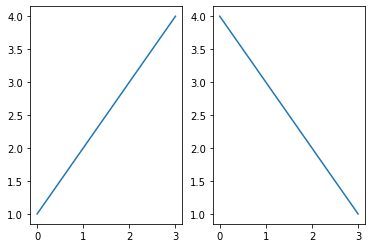

In [ ]:
import matplotlib.pyplot as plt 

fig = plt.figure()
subplot1 = fig.add_subplot(1, 2, 1)  # 1행 1열의 액자에 첫 번째 종이를 만들라는 뜻
subplot2 = fig.add_subplot(1, 2, 2)  # 1행 2열 형태로 종이를 붙이고 그중에 두번째 종이
subplot1.plot([1, 2, 3, 4])
subplot2.plot([4, 3, 2, 1])
plt.show()

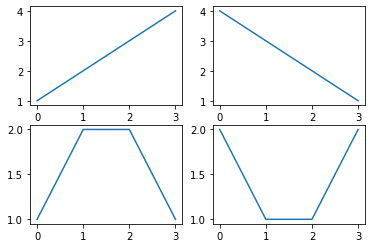

In [ ]:
fig, axes = plt.subplots(2, 2)

axes[0][0].plot([1, 2, 3, 4])
axes[0][1].plot([4, 3, 2, 1])
axes[1][0].plot([1, 2, 2, 1])
axes[1][1].plot([2, 1, 1, 2])
plt.show()

#### bar 차트

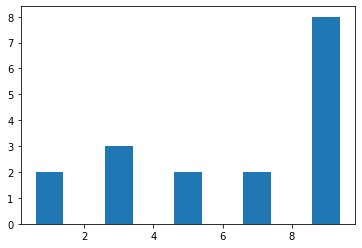

In [ ]:
plt.bar([1, 3, 5, 7, 9], [2, 3, 2, 2, 8])
plt.show()

#### hist 차트

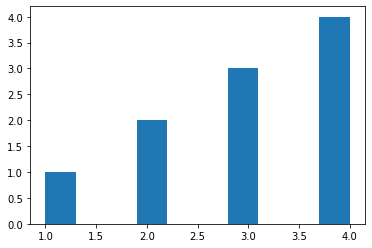

In [ ]:
data = [1, 2, 2, 3, 3, 3, 4, 4, 4, 4]   # 1이 1개, 2가 2개, 3이 3개, 4가 4개
plt.hist(data)
plt.show()

# ==================================================

#### heatmap (주류 데이터 상관관계)

In [1]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv'
drink_df = pd.read_csv(url, ',')

NameError: name 'pd' is not defined

In [ ]:
# 해당하는 데이터의 raw 까지 들어가서 주소를 복사해 와야한다. (gitbub-> csv 파일 들어간 후 raw버튼 클릭 주소복사) 
url = 'https://raw.githubusercontent.com/Myeong1234/python_lecture/main/COVID-19_Korean%20(1).csv'
qwe_df = pd.read_csv(url, ',')
qwe_df

,행정구역,국가/지역,위도,경도,날짜,확진자,사망자,회복자
0,안후이성,중국,31.8257,117.2264,2020-01-22,1,0,0
1,베이징시,중국,40.1824,116.4142,2020-01-22,14,0,0
2,충칭시,중국,30.0572,107.8740,2020-01-22,6,0,0
3,푸젠성,중국,26.0789,117.9874,2020-01-22,1,0,0
4,간쑤성,중국,36.0611,103.8343,2020-01-22,0,0,0
...,...,...,...,...,...,...,...,...
6875,NaN,지브롤터,36.1408,-5.3536,2020-03-04,1,0,0
6876,NaN,설명리히텐슈타인,47.1400,9.5500,2020-03-04,1,0,0
6877,NaN,폴란드,51.9194,19.1451,2020-03-04,1,0,0
6878,NaN,투니시아,34.0000,9.0000,2020-03-04,1,0,0


In [ ]:
drink_df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [ ]:
cols = ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
corr = drink_df[cols].corr(method='pearson')
corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


In [ ]:
corr_column_names = ['beer', 'spirit', 'wine', 'alcohol']

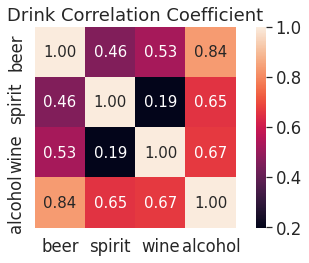

In [ ]:
# heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
                    cbar=True,  #오른쪽에 있는 막대(범주)를 표시
                    annot=True,  #상관계수를 표시
                    square=True, # 정사각형으로 지정하는 것이며, False로 설정 시 직사각형이 됨
                    fmt='.2f', #상관계수의 소수점 자리수를 지정
                    annot_kws={'size': 15}, # 상관계수의 글자 크기를 지정
                    yticklabels=corr_column_names, # y축 레이블 값
                    xticklabels=corr_column_names) # x축 레이블 값
plt.title('Drink Correlation Coefficient')
plt.tight_layout()
plt.show()

"""
피어슨의 상관계수는 일반적으로
-값이 -1.0 ~ -0.7 이면, 강한 음적 상관관계
-값이 -0.7 ~ -0.3 이면, 뚜렷한 음적 상관관계
-값이 -0.3 ~ -0.1 이면, 약한 음적 상관관계
-값이 -0.1 ~ +0.1 이면, 없다고 할 수 있는 상관관계
-값이 +0.1 ~ +0.3 이면, 약한 양적 상관관계
-값이 +0.3 ~ +0.7 이면, 뚜렷한 양적 상관관계
-값이 +0.7 ~ +1.0 이면, 강한 양적 상관관계
"""

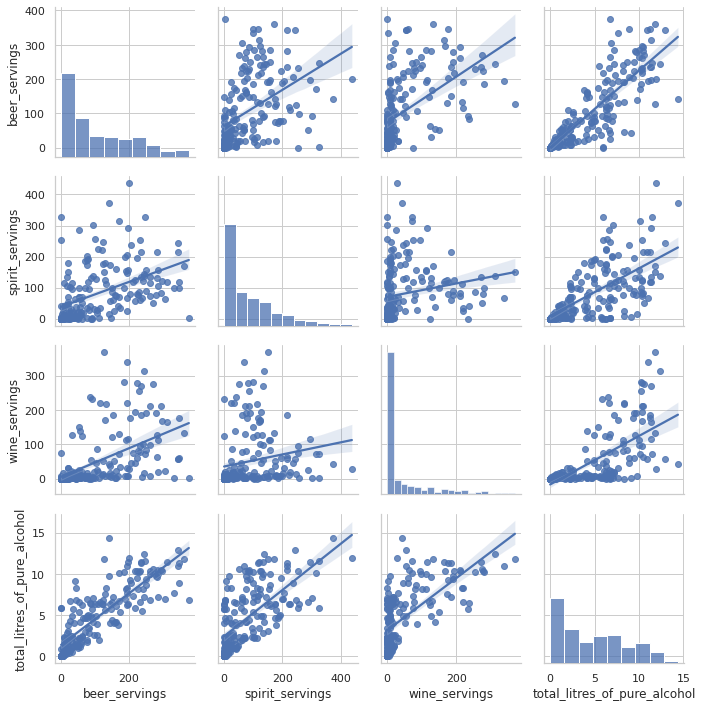

In [ ]:
# pairplot 선형
sns.set(style='whitegrid')
sns.pairplot(drink_df[['beer_servings', 'spirit_servings', 
                     'wine_servings', 'total_litres_of_pure_alcohol']],kind='reg')
#plt.title('Drink Pair Plot')
plt.show()

#### 다른 시각화 방법 (https://dining-developer.tistory.com/30) 참고

In [56]:
from pykrx import stock
from pykrx import bond
import pandas as pd

tickers = stock.get_market_ticker_list("20200401", market='KOSPI')
tickers = tickers[10 : 20]

df_ohlcv = pd.DataFrame()
for i in tickers:
    df = stock.get_market_ohlcv("20200401", "20200430", i)
    df['종목코드'] = i
    df_ohlcv = pd.concat([df_ohlcv, df], axis=0)
df_ohlcv    


,시가,고가,저가,종가,거래량,종목코드
날짜,,,,,,
2020-04-01,135500,136000,128000,128000,72016,000120
2020-04-02,129000,133000,126000,131000,68311,000120
2020-04-03,130000,130500,125500,127000,105709,000120
2020-04-06,128500,131500,127500,131500,74357,000120
2020-04-07,133000,136000,131500,135000,93191,000120
...,...,...,...,...,...,...
2020-04-23,40900,43600,40900,43100,346294,005830
2020-04-24,43900,44350,42000,42500,245584,005830
2020-04-27,43100,45400,42900,45100,262434,005830


In [57]:
# df = stock.get_market_fundamental("20200401", "20200430", market="KOSDAQ")
# dfs = df[10 : 20]
# dfs
import matplotlib.pyplot as plt



df_f = pd.DataFrame()
for i in tickers:
    df = stock.get_market_fundamental("20200401", "20200430", i)
    
    df['fundamental'] = i
    df_f = pd.concat([df_f, df], axis=0)
    df_f.drop(['EPS', 'DIV', 'DPS'], axis=1, inplace=True)
df_f   




,BPS,PER,PBR,fundamental
날짜,,,,
2020-04-01,116702,64.13,1.10,000120
2020-04-02,116702,65.63,1.12,000120
2020-04-03,116702,63.63,1.09,000120
2020-04-06,116702,65.88,1.13,000120
2020-04-07,116702,67.64,1.16,000120
...,...,...,...,...
2020-04-23,72003,5.12,0.60,005830
2020-04-24,72003,5.05,0.59,005830
2020-04-27,72003,5.36,0.63,005830


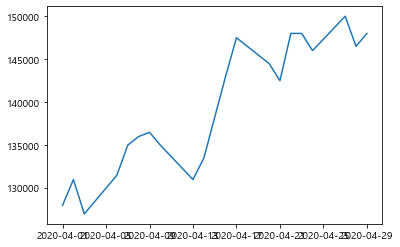

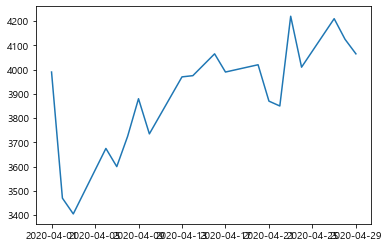

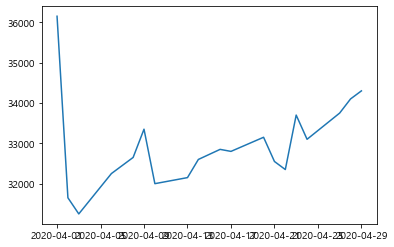

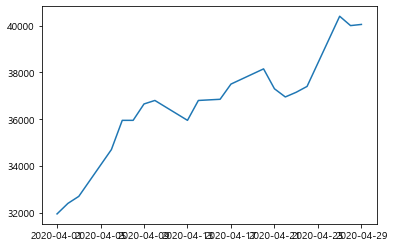

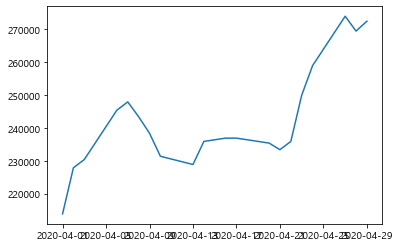

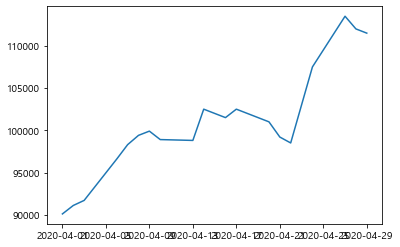

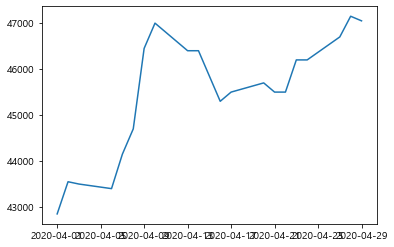

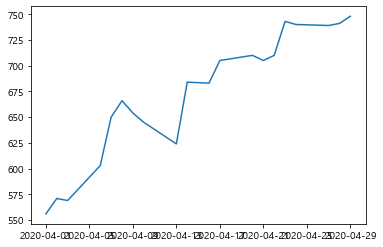

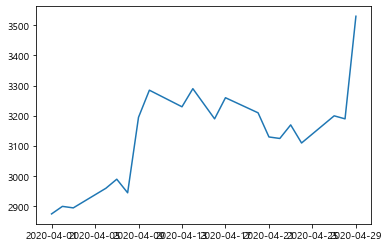

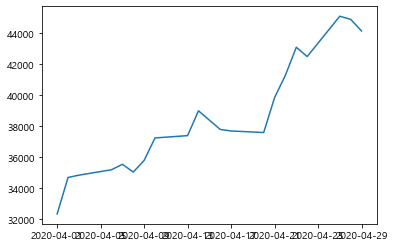

In [58]:
# 4. df_fundamental에서 각 종목별로 그래프 그려보기
import matplotlib.pyplot as plt

for i in tickers:
    plt.plot(df_ohlcv[df_ohlcv['종목코드'] == i].index, df_ohlcv[df_ohlcv['종목코드'] == i] ['종가'])
    plt.show()

In [59]:
df_purchases_of_equities = stock.get_market_trading_volume_by_date("20200401", "20200430", "KOSPI", etf=True, etn=True, elw=True, detail=True)

df_purchases_of_equities = df_purchases_of_equities[['연기금', '은행', '외국인']]



In [60]:
df = stock.get_index_ohlcv("20200401", "20200430", "1028")
df = df[['종가']]
df_last =  pd.concat([df_f, df], axis=0)

In [69]:
# 8. df와 df_purchases_of_equities를 df_last합치기

# df_last = pd.merge(df, df_purchases_of_equities, how='outer', left_index=True, right_index=True)
df_last = pd.concat([df, df_purchases_of_equities], axis=1)
df_last

,종가,연기금,은행,외국인
날짜,,,,
2020-04-01,226.35,-4783292,168145,-30704924
2020-04-02,231.84,2501280,276479,15256632
2020-04-03,231.70,-2917599,-447141,846017
2020-04-06,240.81,2920645,-1093406,15421846
2020-04-07,244.87,-2425285,-781548,1722618
2020-04-08,241.89,-634615,102329,31271143
2020-04-09,245.61,-1977692,-285886,7052329
2020-04-10,248.00,5029384,462363,20359452
2020-04-13,243.40,2330164,644550,-4971173


In [70]:
cols = ['종가','연기금','은행','외국인']
corr = df_last[cols].corr(method='pearson')
corr

,종가,연기금,은행,외국인
종가,1.000000,0.396392,-0.029134,0.213968
연기금,0.396392,1.000000,0.199411,0.678100
은행,-0.029134,0.199411,1.000000,0.056191
외국인,0.213968,0.678100,0.056191,1.000000


In [72]:
corr_column_names = ['종가','연기금','은행','외국인']

<AxesSubplot:>

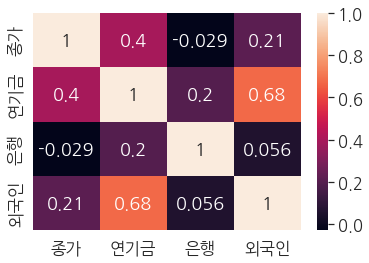

In [87]:
plt.rcParams['font.family'] = 'NanumGothic'


df_last_c = df_last.corr()
sns.heatmap(df_last_c, annot = True)

C:\python38-64\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.draw()
C:\python38-64\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.draw()
C:\python38-64\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.draw()
C:\python38-64\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.draw()
C:\python38-64\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.draw()
C:\python38-64\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 51008 (\N{HANGUL SYLLABLE EUN}) missing from current font.
  fig.canvas.draw()
C:\python38-64\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 54665 (\N{HANG

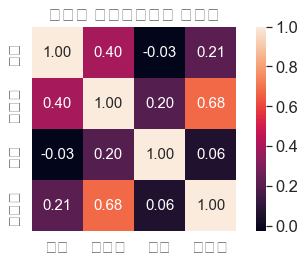

In [82]:
#9. 히트맵 그려보기

# heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
                    cbar=True,  #오른쪽에 있는 막대(범주)를 표시
                    annot=True,  #상관계수를 표시
                    square=True, # 정사각형으로 지정하는 것이며, False로 설정 시 직사각형이 됨
                    fmt='.2f', #상관계수의 소수점 자리수를 지정
                    annot_kws={'size': 15}, # 상관계수의 글자 크기를 지정
                    yticklabels=corr_column_names, # y축 레이블 값
                    xticklabels=corr_column_names) # x축 레이블 값
plt.title('	종가 연기금	은행 외국인')
plt.tight_layout()
plt.show()

C:\python38-64\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\python38-64\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\python38-64\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\python38-64\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\python38-64\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\python38-64\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 51008 (\N{HANGUL SYLLAB

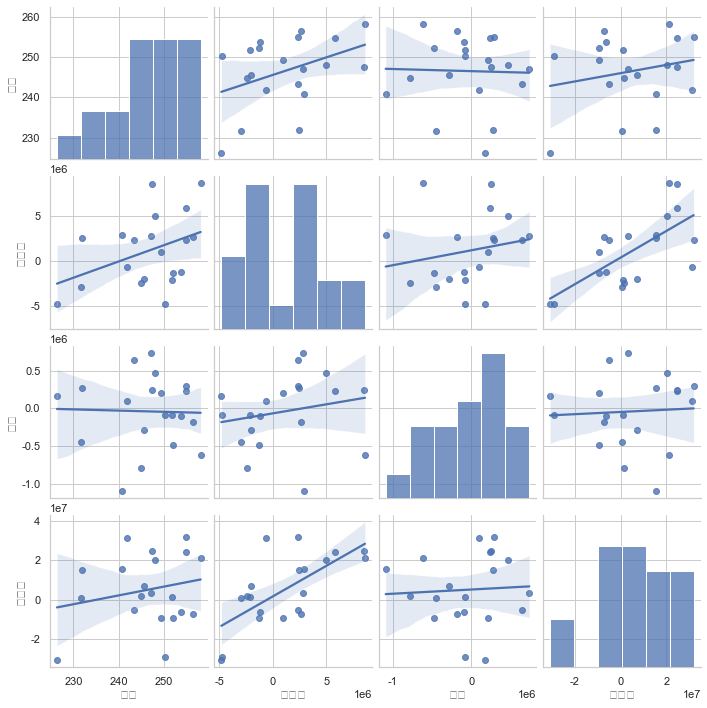

In [81]:
# pairplot 선형
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False
sns.set(style='whitegrid')
sns.pairplot(df_last[['종가', '연기금', 
                     '은행', '외국인']],kind='reg')
#plt.title('Drink Pair Plot')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
x = np.df_last
y1 = np.array([1, 3, 7, 5, 9, 7, 14])
y2 = np.array([1, 3, 5, 7, 9, 11, 13])

# 3. 그래프 그리기
fig, ax1 = plt.subplots()

ax1.plot(x, y1, '-s', color='green', markersize=7, linewidth=5, alpha=0.7, label='Price')
ax1.set_ylim(0, 18)
ax1.set_xlabel('Year')
ax1.set_ylabel('Price ($)')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(x, y2, color='deeppink', label='Demand', alpha=0.7, width=0.7)
ax2.set_ylim(0, 18)
ax2.set_ylabel(r'Demand ($\times10^6$)')
ax2.tick_params(axis='y', direction='in')

plt.show()

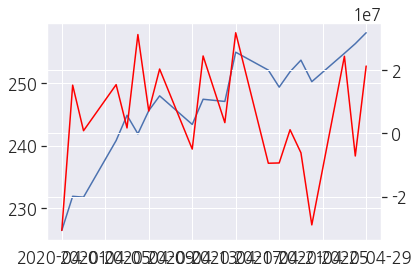

In [89]:
# 10. 한 곳에 두개 그래프 겹쳐서 그려보기 (종가, 외국인) (양쪽에 y 범위나오게)
fig, ax1 = plt.subplots()
ax1.plot(df.index,df['종가'])

ax2 = ax1.twinx()
ax2.plot(df_last.index,df_last['외국인'], color = 'red')

plt.show()

In [91]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_minmax = scaler.fit_transform(df_last)

asd_df = pd.DataFrame(df_minmax, columns = ['종가', '연기금','외국인','은행'] ,index = df_last.index)
print(asd_df)

                  종가       연기금       외국인        은행
날짜                                                
2020-04-01  0.000000  0.000000  0.689177  0.000000
2020-04-02  0.172642  0.543614  0.748359  0.734820
2020-04-03  0.168239  0.139228  0.353050  0.504428
2020-04-06  0.454717  0.574909  0.000000  0.737462
2020-04-07  0.582390  0.175967  0.170366  0.518442
2020-04-08  0.488679  0.309596  0.653222  0.990856
2020-04-09  0.605660  0.209369  0.441143  0.603652
2020-04-10  0.680818  0.732274  0.849906  0.816403
2020-04-13  0.536164  0.530844  0.949434  0.411424
2020-04-14  0.663522  0.992117  0.730790  0.882529
2020-04-16  0.652516  0.567866  1.000000  0.545277
2020-04-17  0.901572  0.531638  0.757239  1.000000
2020-04-20  0.811006  0.258929  0.333003  0.339820
2020-04-21  0.724843  0.431926  0.710853  0.341275
2020-04-22  0.802830  0.200494  0.551272  0.509343
2020-04-23  0.861321  0.265899  0.544970  0.392630
2020-04-24  0.752516  0.002041  0.550334  0.027976
2020-04-27  0.895912  0.792384 

### 실습 Merge & KRX API 활용 스크래핑
 - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html 참고
 - DataFrame.merge(right, how='inner', on=None, left_on=None, right_on=None, 
   left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)
 - KRX 스크래핑 정리된 깃허브 https://github.com/sharebook-kr/pykrx 참고

### 실습
- 참고 스크래핑을 많이 할 시(반복문)에는 time.sleep(1)을 주어 아이피 차단 당하지 않도록 주의한다.
- KRX 스크래핑을 활용하여 2020년 4월 20일에 KOSPI 시장의 티커를 받아오기.
1. 티커 중 앞에서 10번째부터 20번째까지 티커 ticker 저장하기
2. ticker-> 2020년 4월 (시가/고가/저가/종가/거래량)정보 받아와 df_ohlcv 저장하기 (칼럼은 날짜/시가/고가/저가/종가/거래량/티커)
3. ticker-> 2020년 4월 20일 (PER/EPS/PBR)정보 받아와 df_fundamental 저장하기 (칼럼 PER/EPS/PBR/티커)
4. df_fundamental에서 각 종목별로 그래프 그려보기
5. get_market_trading_volume_by_date을 활용하여 거래 실적 중 (4월 한달) 연기금 데이터  받아오고 df_purchases_of_equities에 저장
6. df_purchases_of_equities의 칼럼을 ['연기금','외국인','은행'] 저장하기
7. 코스피 200 ohlcv 받아와 종가 컬럼만 df에 저장
8. df와 df_purchases_of_equities를 df_last합치기
9. 히트맵 그려보기
10. 한 곳에 두개 그래프 겹쳐서 그려보기 (종가, 외국인) (양쪽에 y 범위나오게)
11. minmax 보기
12. df_last 에서 연금 칼럼 내림차순으로 정렬 해보기
13. 화살표 그리는 것 보기
14. csv 파일로 저장해 보기 , 불러와 보기

In [14]:
pip install pykrx

     |████████████████████████████████| 93 kB 1.5 MB/s 
     |████████████████████████████████| 51 kB 487 kB/s 
     |████████████████████████████████| 251 kB 40.2 MB/s 


In [15]:
from pykrx import stock

No Korean fonts found. Please install the font shown belowbecause Hangul can be broken on the chart.
 - NanumBarunGothic font is required.

    1) font install

    !sudo apt-get install -y fonts-nanum
    !sudo fc-cache -fv
    !rm ~/.cache/matplotlib -rf

    2) runtime restart if colab
    
PYKRX works fine regardless of font installation.


In [16]:
# 코스피 티커 받아오기


['095570', '006840', '027410', '282330', '138930', '001460', '001465', '001040', '079160', '00104K', '000120', '011150', '011155', '001045', '097950', '097955', '000590', '012030', '016610', '005830', '000990', '000995', '139130', '001530', '004840', '155660', '069730', '017940', '007700', '114090', '078930', '006360', '001250', '007070', '078935', '012630', '039570', '089470', '294870', '011200', '082740', '003560', '175330', '234080', '001060', '001067', '001065', '096760', '105560', '002380', '009070', '009440', '119650', '092220', '016380', '016385', '001390', '001940', '025000', '092230', '000040', '044450', '030200', '033780', '030210', '058850', '058860', '093050', '003550', '034220', '001120', '051900', '051905', '003555', '032640', '011070', '066570', '066575', '108670', '108675', '037560', '051910', '051915', '079550', '006260', '010120', '000680', '229640', '023150', '035420', '181710', '005940', '005945', '338100', '034310', '008260', '004250', '004255', '010060', '005490',

In [17]:
# 티커 10이상 20미만 뽑아 내기


['000120',
 '011150',
 '011155',
 '001045',
 '097950',
 '097955',
 '000590',
 '012030',
 '016610',
 '005830']

In [18]:
# get_market_ohlcv 이용해서(티커 10개) 20200401~ 20200430까지 데이터 받아오기 


                시가      고가      저가      종가     거래량    회사코드
날짜                                                        
2020-04-01  135500  136000  128000  128000   72016  000120
2020-04-02  129000  133000  126000  131000   68311  000120
2020-04-03  130000  130500  125500  127000  105709  000120
2020-04-06  128500  131500  127500  131500   74357  000120
2020-04-07  133000  136000  131500  135000   93191  000120
...            ...     ...     ...     ...     ...     ...
2020-04-23   40900   43600   40900   43100  346294  005830
2020-04-24   43900   44350   42000   42500  245584  005830
2020-04-27   43100   45400   42900   45100  262434  005830
2020-04-28   45000   45550   44550   44900  240765  005830
2020-04-29   45050   45500   44050   44150  279516  005830

[200 rows x 6 columns]


In [19]:
# get_market_fundamental 이용해서 종목 코드별로  PER/EPS/PBR/티커 저장 4월 30일까지 


,BPS,PER,PBR,EPS,DIV,DPS,회사코드
날짜,,,,,,,
2020-04-01,116702,64.13,1.10,1996,0.00,0,000120
2020-04-02,116702,65.63,1.12,1996,0.00,0,000120
2020-04-03,116702,63.63,1.09,1996,0.00,0,000120
2020-04-06,116702,65.88,1.13,1996,0.00,0,000120
2020-04-07,116702,67.64,1.16,1996,0.00,0,000120
...,...,...,...,...,...,...,...
2020-04-13,72003,4.45,0.52,8413,5.35,2000,005830
2020-04-14,72003,4.64,0.54,8413,5.13,2000,005830
2020-04-16,72003,4.49,0.52,8413,5.29,2000,005830


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


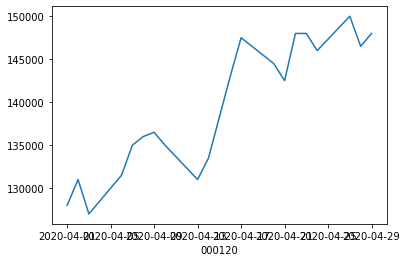

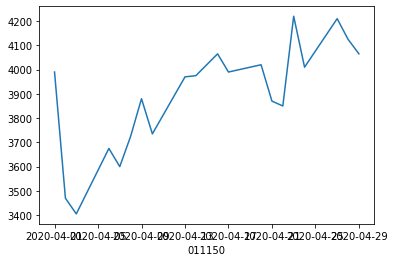

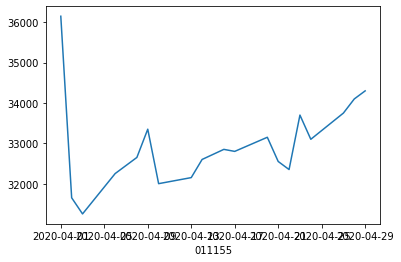

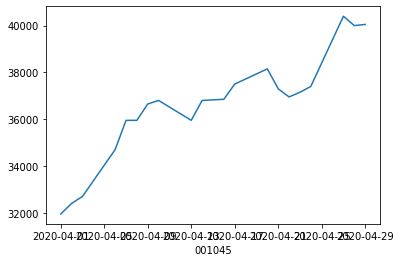

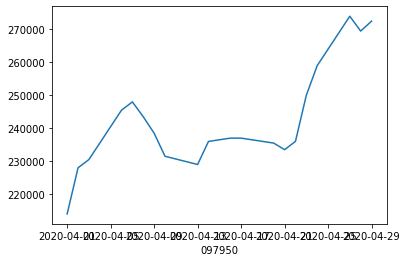

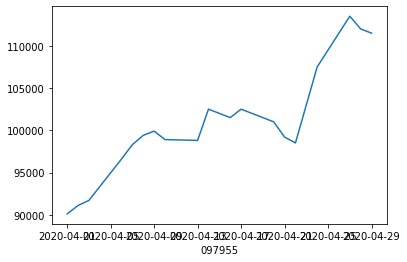

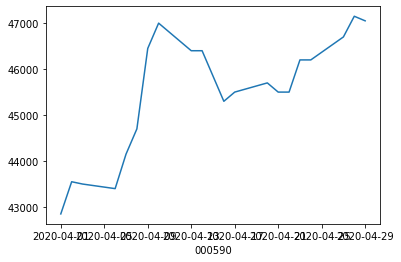

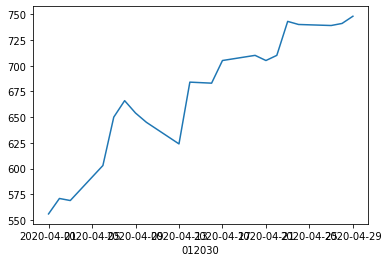

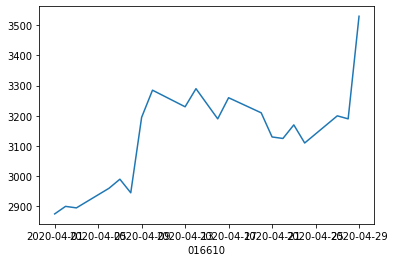

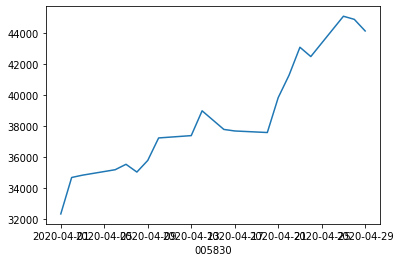

In [20]:
# 종목 별로 종가 그래프 그려보기



In [21]:
# get_market_trading_volume_by_date 이용해서 연기금 데이터 받아오기


,금융투자,보험,투신,사모,은행,기타금융,연기금,기타법인,개인,외국인,기타외국인,전체
날짜,,,,,,,,,,,,
2020-04-01,-5697127,118596,-1783314,-902869,-44504,642097,-3853041,1395395,33723273,-23831466,232960,0
2020-04-02,3967947,671770,515411,-290075,-5148,472179,4498194,-936871,-329115,-8446659,-117633,0
2020-04-03,-3080537,-100095,-1766316,-1319006,-68896,704014,-1097980,338675,23167664,-16630604,-146919,0
2020-04-06,15641415,524822,327745,15181,19599,195503,4812420,-4723672,-21002870,4014191,175666,0
2020-04-07,1666252,125344,245749,-1444055,-174506,168539,-2530144,1270543,12617303,-12072491,127466,0
2020-04-08,-7744658,529582,-417066,1617329,12106,225173,-1284245,-602397,8003014,-258549,-80289,0
2020-04-09,-4145862,300609,3309886,-735512,-402558,167293,-1563409,-1224892,13815075,-9414818,-105812,0
2020-04-10,-7792545,896481,2152228,-734155,112842,342325,6563627,-773371,6668830,-7537519,101257,0
2020-04-13,-7106808,-545590,-1512137,-1739406,41108,289671,2280334,-5592238,28031252,-14389369,243183,0


In [22]:
# get_index_ohlcv 이용해서 kospi 200 데이터 받아오기 kospi 200 코드는 "1028"


코스피 200         시가      고가      저가      종가        거래량           거래대금
날짜                                                                  
2020-04-01  234.23  237.52  226.34  226.35  228582917  7913912554463
2020-04-02  227.47  232.22  223.60  231.84  181789449  7548550111929
2020-04-03  232.48  234.45  229.23  231.70  181037704  6313975247155
2020-04-06  234.40  241.19  233.75  240.81  190735319  6552309976639
2020-04-07  245.65  247.39  240.68  244.87  224450405  8030025997464
2020-04-08  243.71  246.99  241.77  241.89  173124206  6327462222493
2020-04-09  246.13  246.46  243.11  245.61  175943828  6264902174737
2020-04-10  245.14  248.21  244.02  248.00  286111384  8017524561019
2020-04-13  246.59  246.90  243.39  243.40  195898883  6122882379698
2020-04-14  246.20  248.55  244.58  247.45  193118126  6324478963869
2020-04-16  244.99  247.87  243.61  247.10  197540955  7080233242832
2020-04-17  252.52  257.37  252.38  255.02  287358889  8845497222027
2020-04-20  253.85  255.93  251.46

In [23]:
# 종가, 연기금, 외국인, 은행 합치기


,종가,연기금,외국인,은행
날짜,,,,
2020-04-01,226.35,-3853041,-23831466,-44504
2020-04-02,231.84,4498194,-8446659,-5148
2020-04-03,231.70,-1097980,-16630604,-68896
2020-04-06,240.81,4812420,4014191,19599
2020-04-07,244.87,-2530144,-12072491,-174506
2020-04-08,241.89,-1284245,-258549,12106
2020-04-09,245.61,-1563409,-9414818,-402558
2020-04-10,248.00,6563627,-7537519,112842
2020-04-13,243.40,2280334,-14389369,41108


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50808 missing from current font.
  font.set_

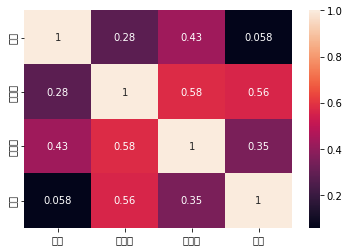

In [24]:
# 위의 데이터프레임으로 히트맵 그려보기


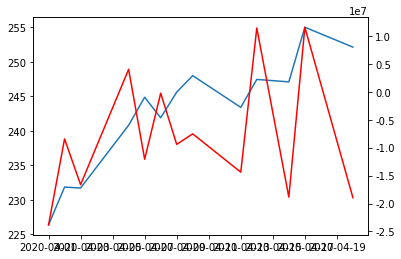

In [25]:
# 두 그래프(종가, 외국인) 를 한 번에 그리기 y축 양쪽에 표시 되도록


In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_minmax = scaler.fit_transform(asd)

asd_df = pd.DataFrame(df_minmax, columns = ['종가', '연기금','외국인','은행'] ,index = asd.index)
print(asd_df)

                  종가       연기금       외국인        은행
날짜                                                
2020-04-01  0.000000  0.000000  0.000000  0.694711
2020-04-02  0.191489  0.667524  0.434917  0.771071
2020-04-03  0.186606  0.220215  0.203563  0.647385
2020-04-06  0.504360  0.692641  0.787176  0.819086
2020-04-07  0.645971  0.105741  0.332417  0.442476
2020-04-08  0.542030  0.205327  0.666389  0.804548
2020-04-09  0.671782  0.183013  0.407548  0.000000
2020-04-10  0.755145  0.832617  0.460618  1.000000
2020-04-13  0.594698  0.490248  0.266921  0.860819
2020-04-14  0.735961  1.000000  0.996259  0.871523
2020-04-16  0.723753  0.524504  0.140640  0.625887
2020-04-17  1.000000  0.458836  1.000000  0.907128
2020-04-20  0.899547  0.208352  0.137918  0.673046


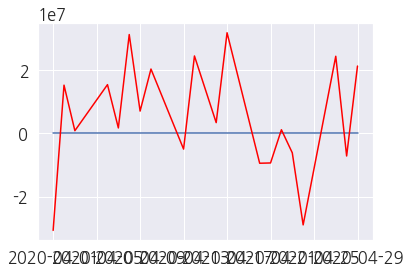

In [92]:
import matplotlib.pyplot as plt

plt.plot(df_last.index,df_last['종가'])
plt.plot(df_last.index,df_last['외국인'], color = 'red')

plt.show()

In [93]:
# 연기금 칼럼 기준으로 내림차순 정렬하기
df_last.sort_values['연기금', ascending = False]

SyntaxError: invalid syntax (3122133198.py, line 2)

In [29]:
# 정보 보기


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13 entries, 2020-04-01 to 2020-04-20
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   종가      13 non-null     float64
 1   연기금     13 non-null     int64  
 2   외국인     13 non-null     int64  
 3   은행      13 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 520.0 bytes


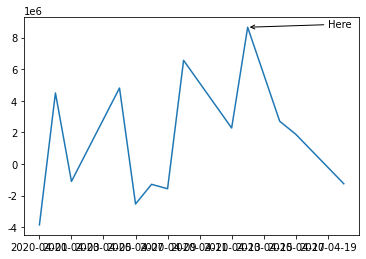

In [31]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots()

ax.plot(asd.index, asd['연기금'])
plt.annotate("Here", xytext=(pd.to_datetime('2020-04-19'), 8657716), xy=(pd.to_datetime('2020-04-14'), 8657716), 
            arrowprops=dict(arrowstyle="->"))

# arrow = patches.FancyArrowPatch((pd.to_datetime('2020-04-19'), 8657716),
#                                 (pd.to_datetime('2020-04-14'), 8657716),
#                                 mutation_scale =10,
#                                 color = 'red',
#                                 fill = True,
#                                 alpha =0.8)
# plt.gca().add_patch(arrow)
# plt.xlim(pd.to_datetime('2020-04-01'), pd.to_datetime('2020-04-20')) 

plt.show()

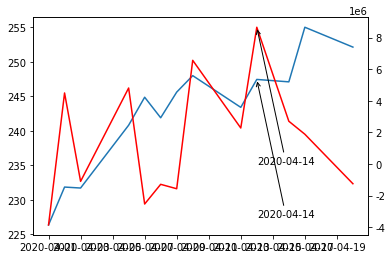

In [32]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()

ax1.plot(df.index,df['종가'])
ax1.annotate("2020-04-14", xy=(pd.to_datetime('2020-04-14'), df[df.index==pd.to_datetime('2020-04-14')]['종가']), xytext=(pd.to_datetime('2020-04-14'), df[df.index==pd.to_datetime('2020-04-14')]['종가']-20),
            arrowprops=dict(arrowstyle="->"))

ax2 = ax1.twinx()
ax2.plot(df_v.index,df_v['연기금'], color = 'red')
# ax1.plot(asd.index, asd['연기금'])
# plt.arrow( pd.to_datetime('2020-04-14'), 8657716 , 0.5, 0.5 ,head_width=0.15,  head_length=0.1)
ax2.annotate("2020-04-14", xy=(pd.to_datetime('2020-04-14'), 8657716), xytext=(pd.to_datetime('2020-04-14'), 2),
            arrowprops=dict(arrowstyle="->"))
plt.show()

## scaler

1. Standard Scaler
- 기존 변수의 범위를 정규 분포로 변환하는 것.
- 데이터의 최소 최대를 모를 때 사용
- 모든 피처의 평균을 0, 분산을 1로 만듬
- 이상치가 있다면 평균과 표준편차에 영향을 미치기 때문에 데이터의 확산이 달라지게 됨
-  이상치가 많다면 사용하지 않는 것이 좋음 

2. Normalizer
- 각 변수의 값을 원점으로부터 1만큼 떨어져 있는 범위 내로 변환 
- 빠르게 학습할 수 있고 과대적합 확률을 낮출 수 있음
   
3. MinMaxScaler
- 데이터의 값들을 0~1 사이의 값으로 변환시키는 것
- 각 변수가 정규분포(bell-shape)가 아니거나 표준 편차가 작을 때 효과적
- BUT Standard Scaler와 같이 이상치 존재에 민감

4. Robust Scaler
- 모든 피처가 같은 크기를 갖는 다는 점이 standard와 유사 
- BUT 평균과 분산이 아닌 중위수(median)과 IQR(사분위수)를 사용함
- Standard scaler에 비해 이상치의 영향이 적어짐 



In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'x1' : np.arange(11), 'x2' : np.arange(11) ** 2})
df

,x1,x2
0,0,0
1,1,1
2,2,4
3,3,9
4,4,16
5,5,25
6,6,36
7,7,49
8,8,64
9,9,81


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_std = scaler.fit_transform(df)

pd.DataFrame(df_std, columns = ['x1_std', 'x2_std'])

,x1_std,x2_std
0,-1.581139,-1.066004
1,-1.264911,-1.035546
2,-0.948683,-0.944175
3,-0.632456,-0.791888
4,-0.316228,-0.578688
5,0.000000,-0.304572
6,0.316228,0.030457
7,0.632456,0.426401
8,0.948683,0.883260
9,1.264911,1.401033


In [ ]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
df_Nml = scaler.fit_transform(df)

pd.DataFrame(df_Nml, columns = ['x1_std', 'x2_std'])

,x1_std,x2_std
0,0.000000,0.000000
1,0.707107,0.707107
2,0.447214,0.894427
3,0.316228,0.948683
4,0.242536,0.970143
5,0.196116,0.980581
6,0.164399,0.986394
7,0.141421,0.989949
8,0.124035,0.992278
9,0.110432,0.993884


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_minmax = scaler.fit_transform(df)

pd.DataFrame(df_minmax, columns = ['x1_minmax', 'x2_minmax'])

,x1_minmax,x2_minmax
0,0.0,0.00
1,0.1,0.01
2,0.2,0.04
3,0.3,0.09
4,0.4,0.16
5,0.5,0.25
6,0.6,0.36
7,0.7,0.49
8,0.8,0.64
9,0.9,0.81


In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_robust = scaler.fit_transform(df)

pd.DataFrame(df_robust, columns = ['x1_robust', 'x2_robust'])

,x1_robust,x2_robust
0,-1.0,-0.50
1,-0.8,-0.48
2,-0.6,-0.42
3,-0.4,-0.32
4,-0.2,-0.18
5,0.0,0.00
6,0.2,0.22
7,0.4,0.48
8,0.6,0.78
9,0.8,1.12


In [ ]:
import pandas as pd
day_index = []
date_index = []
print(date_index)

# 평일 데이터 만들어 주고
dates = pd.date_range('2020-01-01','2020-01-24',freq='B')
# print(dates)
# datetime -> str로 형변환 뒤에 시간 붙여주기 위해서
dates = dates.astype(str)

for b_day in dates:
    start_date = b_day[:10] + ' 09:00:00' # 뽑아준 날짜 들에 시작 시간 붙이기
    end_date = b_day[:10] +' 15:31:00'    # 뽑아준 날짜 들에 끝 시간 붙이기
    range = pd.date_range(start_date, end_date, freq='min') # 1분 단위로 만들어 주기
    range = range.astype(str).tolist() # 형변환 밑 리스트 형으로 변환
    date_index.extend(range)
#     print(date_index)
#     break;
    
df_1 = pd.DataFrame(index = date_index)
df_1['column111'] = 1
print(df_1)

[]
                     column111
2020-01-01 09:00:00          1
2020-01-01 09:01:00          1
2020-01-01 09:02:00          1
2020-01-01 09:03:00          1
2020-01-01 09:04:00          1
...                        ...
2020-01-24 15:27:00          1
2020-01-24 15:28:00          1
2020-01-24 15:29:00          1
2020-01-24 15:30:00          1
2020-01-24 15:31:00          1

[7056 rows x 1 columns]
